# Delta Function Appeal

This notebook presents an agent-based model that simulates the propagation of a disease through a network.
It demonstrates how to use the [agentpy](https://agentpy.readthedocs.io) package to create and visualize networks, use the interactive module, and perform different types of sensitivity analysis. 

In [1]:
# Model design
import agentpy as ap
import networkx as nx 
import random 
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt 
import seaborn as sns
import IPython

from sklearn.utils import resample
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import KFold

import pickle

np.random.seed(42)

In [2]:
import os

if os.path.isdir("../notebooks"):
    os.chdir("..")

from utils import viz, delta_function, generate_init


from agent import Person

from model import VirusModel, VirusModel_baseline




## Proof of concept classifier

Here we show that the classifier is performing well and as expected. While explaininig the poor performance on the data through a high level of non-determnism in the data, due to the fraud distribution.

In [3]:

accuracy = []
for i in np.arange(0,1.2,0.2):
    X, y = generate_init(train_clf = True, n = 100000, fraud_det =i)

    X = pd.DataFrame(X)
    y = pd.DataFrame(y)
    y=y.rename(columns = {0:'y'})
    df = pd.concat([X,y], axis =1)


    # Separate majority and minority classes
    df_majority = df[df['y'] ==0]
    df_minority = df[df['y'] ==1]

    # Downsample majority class
    df_majority_downsampled = resample(df_majority, 
                                    replace=False,    
                                    n_samples=40000)#Upsample minority class
    df_minority_upsampled = resample(df_minority, 
                                    replace=True,     
                                    n_samples=40000)# Combine minority class with downsampled majority class
    df_up_down_sampled = pd.concat([df_majority_downsampled, df_minority_upsampled])

    y = df_up_down_sampled['y']
    X = df_up_down_sampled.drop('y', axis = 1)



    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)

    pipe = make_pipeline(StandardScaler(),  MLPClassifier(solver='adam', alpha = 0.0001, hidden_layer_sizes=(30, 15), random_state=1)) # BaggingClassifier(estimator=SVC(class_weight={0:0.50, 1:0.50}),n_estimators=10, random_state=0))
    pipe.fit(X_train, y_train) 
    acc = (pipe.score(X_test,y_test))
    accuracy.append(acc)
    pred = pipe.predict(X_test)



Text(0, 0.5, 'Test Accuracy')

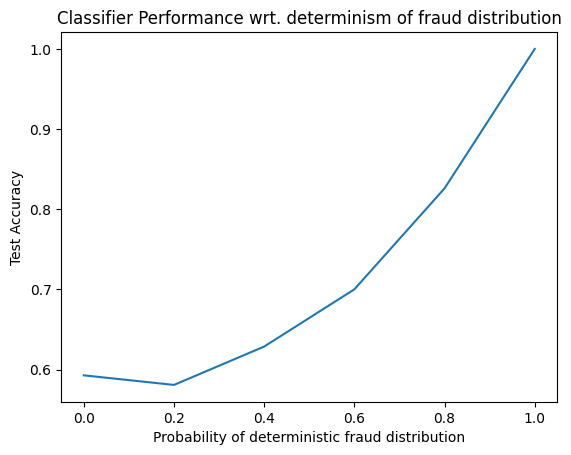

In [7]:
sns.lineplot(y = accuracy, x = np.arange(0,1.2,0.2))
plt.title('Classifier Performance wrt. determinism of fraud distribution')
# Set x-axis label
plt.xlabel('Probability of deterministic fraud distribution')
# Set y-axis label
plt.ylabel('Test Accuracy')